In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DF.csv", )

df = df.drop(['date', 'Connection','Accept-Encoding','CountryName'], 1)

In [2]:
df['path']=df['path'].str[:1]


In [3]:
df2 = df.groupby(["IP","cookie","User-Agent","CountryCode","path","Accept-Language"]).size().reset_index(name="count")
df2 = df2
#df2.head()

In [4]:
df_p = df2[df2['path']=="p"].rename(columns={"count": "p"}).drop(["path"],1)
df_k = df2[df2['path']=="k"].rename(columns={"count": "k"}).drop(["path"],1)

In [5]:
df_m = df_p.merge(df_k, on=['cookie','IP', 'User-Agent', 'CountryCode','Accept-Language'], how='outer')
#df_m.head()

In [6]:
def select_favorite(p,k):
    if pd.isna(p): 
        return "Kitten"
    elif pd.isna(k):
        return "Puppy"
    elif (p==k):
        return "Same"
    elif (p>k):
        return "Puppy"
    else:
        return "Kitten"
    

In [7]:
df_m['favorite'] = df_m.apply(lambda row: select_favorite(row['p'],row['k']), axis=1)
#df_m.head()


In [8]:
df_m2 = df_m.drop(['IP', 'cookie','p', 'k'], 1)
#df_m2.head()


In [9]:
import pycountry_convert as pc

def country_to_cont(cc):
    cont_code = pc.country_alpha2_to_continent_code(cc)
    cont_name = pc.convert_continent_code_to_continent_name(cont_code)
    return cont_name





In [10]:
df_t = df_m2.loc[df_m2['CountryCode'].notna()].copy(deep=True)
df_t.head()
df_t['Continent'] = df_t.apply(lambda row: country_to_cont(row['CountryCode']), axis=1)
df_t = df_t.drop(['CountryCode'],1)
df_t.to_csv("favorites.csv",index=False)

In [11]:
df_t['IP']="*"
df_t['cookie']="*"
df_t['city']="*"
df_t.head(10)

,User-Agent,Accept-Language,favorite,Continent,IP,cookie,city
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*
1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Same,Asia,*,*,*
2,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Kitten,Asia,*,*,*
3,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Kitten,Asia,*,*,*
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Same,Asia,*,*,*
6,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*
7,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*
8,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*


In [12]:
df_t.groupby(['Continent','User-Agent','Accept-Language']).size().reset_index().sort_values(by=0)
dups = df_t.pivot_table(index=['Continent','User-Agent','Accept-Language'], aggfunc='size')

In [13]:
#dups.sort_values(0).to_frame()

In [14]:
anon_df = df_t.groupby(['Continent', 'favorite']).size().reset_index(name='value')
pivot_df = anon_df.pivot(index='Continent', columns='favorite', values='value')
pivot_df

favorite,Kitten,Puppy,Same
Continent,,,
Africa,2016,1387,188
Asia,10177,6378,1008
Europe,9383,7302,857
North America,23573,18244,1932
South America,2845,6993,227


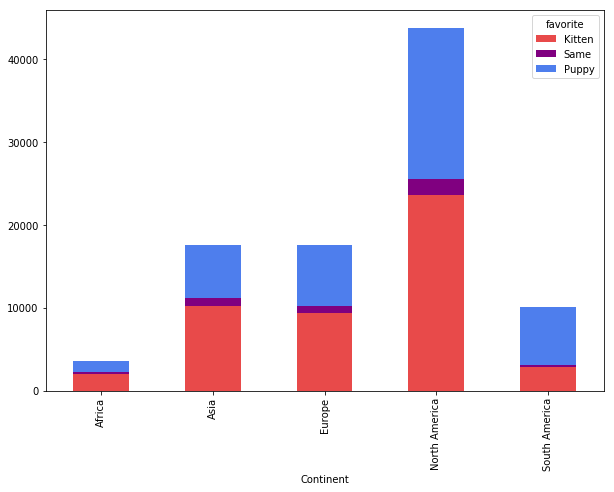

In [15]:
colors = ["#e84a4a","#800080", "#4e7eed"]
pivot_df.loc[:,['Kitten', 'Same', 'Puppy']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [18]:
import random
#differential privacy

def randomize_sensitive(pref):
    toss1 = random.randint(0,1)
    toss2 = random.randint(0,2)
    if (toss1 == 1):
        if (toss2 == 0):
            return 'Kitten'
        elif (toss2 == 1):
            return 'Puppy'
        else:
            return 'Same'
    else:
        return pref
    

df_t['new-favorite'] = df_t['favorite'].apply(randomize_sensitive)
df_t

,User-Agent,Accept-Language,favorite,Continent,IP,cookie,city,new-favorite
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*,Puppy
1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Same,Asia,*,*,*,Same
2,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Kitten,Asia,*,*,*,Puppy
3,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Kitten,Asia,*,*,*,Puppy
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*,Same
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Same,Asia,*,*,*,Puppy
6,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*,Puppy
7,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*,Puppy
8,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*,Puppy
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,lu,Puppy,Asia,*,*,*,Puppy


In [22]:
diff_df = df_t.groupby(['Continent', 'new-favorite']).size().reset_index(name='value')
pivot_df2 = diff_df.pivot(index='Continent', columns='new-favorite', values='value')
pivot_df2

new-favorite,Kitten,Puppy,Same
Continent,,,
Africa,1580,1308,703
Asia,7922,6107,3534
Europe,7553,6629,3360
North America,18973,16481,8295
South America,3078,5174,1813


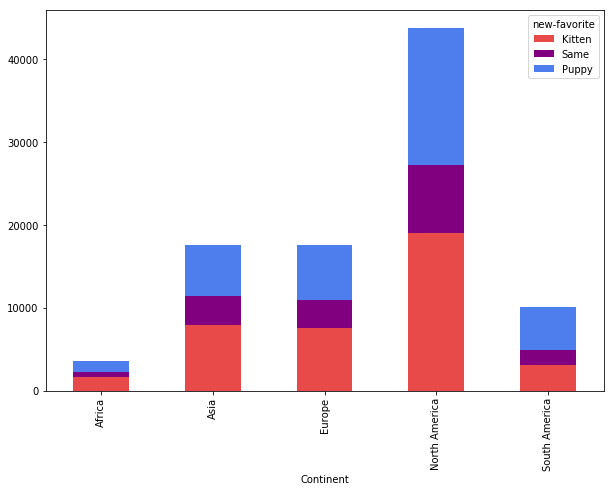

In [25]:
colors = ["#e84a4a","#800080", "#4e7eed"]
pivot_df2.loc[:,['Kitten', 'Same', 'Puppy']].plot.bar(stacked=True, color=colors, figsize=(10,7))